<a href="https://colab.research.google.com/github/robertchoi/BatteryDatasetImplementation/blob/master/%EC%B9%BC%EB%A7%8C%ED%95%84%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_%ED%95%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers, Sequential
from keras.layers import RNN
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import layers, models
from sklearn import preprocessing
from keras import datasets
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn import model_selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/J0003_0024_0222_20110307012737_cell_1.csv', encoding='utf8')
df = pd.read_excel('/content/drive/MyDrive/J0003_0017_0193_20110218041739_cell_16.xlsx')
df

,2011-02-18 16:17:10,0.234
0,2011-02-18 18:17:10,0.234
1,2011-02-18 19:17:10,0.234
2,2011-02-18 20:17:10,0.235
3,2011-02-18 21:17:10,0.236
4,2011-02-18 22:17:10,0.234
...,...,...
456,2011-09-17 04:20:54,0.476
457,2011-09-17 16:20:54,0.477
458,2011-09-18 04:20:54,0.478
459,2011-09-18 16:20:54,0.477


In [ ]:
Resistance = df.iloc[:, 1] #xlsx파일일 시

In [ ]:
# Resistance = df['Resistance'] # csv파일일 시

# Resistance.plot()

In [ ]:
def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm for One Variable."""
    # (1) Prediction.
    x_pred = A * x_esti
    P_pred = A * P * A + Q

    # (2) Kalman Gain.
    K = P_pred * H / (H * P_pred * H + R)

    # (3) Estimation.
    x_esti = x_pred + K * (z_meas - H * x_pred)

    # (4) Error Covariance.
    P = P_pred - K * H * P_pred

    return x_esti, P

In [ ]:

A = 1
H = 1
Q = 0.00001
R = 0.001

x_0 = Resistance[0]
P_0 = 2

In [ ]:
n_samples = len(df)

In [ ]:
x_esti, P = None, None
esti_save = np.zeros(n_samples)

In [ ]:
for i in range(n_samples):
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(Resistance[i], x_esti, P)
        
    esti_save[i] = x_esti

Text(0, 0.5, 'Voltage [V]')

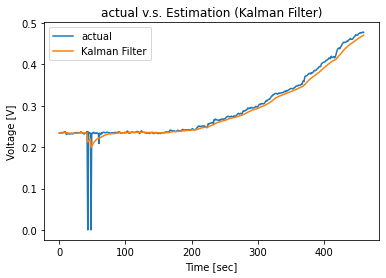

In [ ]:
plt.plot(Resistance, label='actual')
plt.plot(esti_save, label='Kalman Filter')
plt.legend(loc='upper left')
plt.title('actual v.s. Estimation (Kalman Filter)')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage [V]')